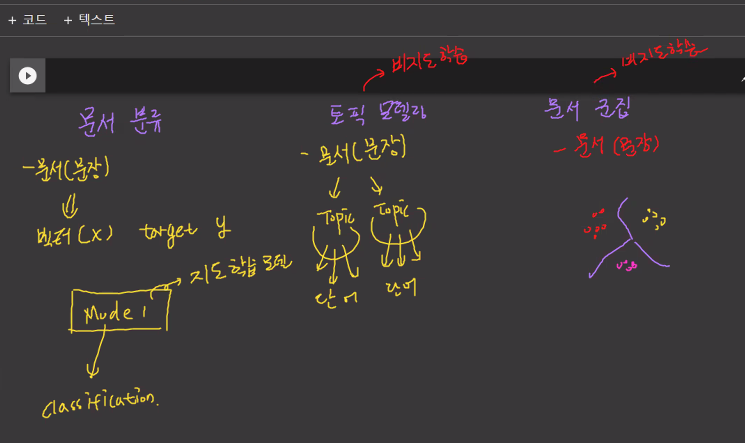

In [ ]:
# 띄어쓰기있으면 안됨

In [ ]:
!unzip /content/drive/MyDrive/멀티캠퍼스9회차I반/10자연어처리NLP/topics.zip -d /content/drive/MyDrive/멀티캠퍼스9회차I반/10자연어처리NLP/data

In [2]:
DATA_PATH = '/content/drive/MyDrive/멀티캠퍼스9회차I반/10자연어처리NLP/data/topics'

In [1]:
import pandas as pd
import glob, os
import warnings 
warnings.filterwarnings('ignore')

pd.set_option('display.max_colwidth', 700)

# glob
사용자가 제시한 조건에 맞는 파일명을 리스트 형식으로 반환한다. 단, 조건에 정규식을 사용할 수 없으며 '*'와 '?'같은 와일드카드만을 지원한다.


In [3]:
all_files = glob.glob(os.path.join(DATA_PATH, "*.data"))
all_files[:3]

['/content/drive/MyDrive/멀티캠퍼스9회차I반/10자연어처리NLP/data/topics/screen_netbook_1005ha.txt.data',
 '/content/drive/MyDrive/멀티캠퍼스9회차I반/10자연어처리NLP/data/topics/service_bestwestern_hotel_sfo.txt.data',
 '/content/drive/MyDrive/멀티캠퍼스9회차I반/10자연어처리NLP/data/topics/rooms_swissotel_chicago.txt.data']

In [4]:
# glob을 활용해 데이터 디렉토리 내에 있는 .data 파일 불러오기
# 원래는 파일명확인하고 리스트에 추가하고해야하는데 glob쓰면 편함
all_files = glob.glob(os.path.join(DATA_PATH, "*.data"))

# 파일 이름
file_names = []

# 내용
contents = []

for data_file in all_files:

  temp_df = pd.read_table(data_file, index_col=None, header=0, encoding='latin1')
  #  pd.read_table 일반 데이터 파일을 불러올 때 사용

  file_name = data_file.split('/')[-1] # 위에accuracy_garmin_nuvi_255W_gps.txt.data' 이런거 가져올거임
  file_name = file_name.split(".")[0]  # accuracy_garmin_nuvi_255W_gps 진정한 파일 이름만
  file_names.append(file_name)
  contents.append(temp_df.to_string())

file_names[:3], contents[:3]

(['screen_netbook_1005ha',
  'service_bestwestern_hotel_sfo',
  'rooms_swissotel_chicago'],
 ["                                                                                                                                                                                                                                                                        Keep in mind that once you get in a room full of light or step outdoors screen reflections could become annoying .\n0                                                                                                                                                                                                                                                                                                       I've used mine outside on a sunny day, and the screen is still very much legible .\n1                                                                                                                                                

In [5]:
# 데이터프레임으로 만들기
doc_df = pd.DataFrame({
    "filename" : file_names,
    "content" : contents}
)
doc_df.head()

,filename,content
0,screen_netbook_1005ha,Keep in mind that once you get in a room full of light or step outdoors screen reflections could become annoying .\n0 I've used mine outsi...
1,service_bestwestern_hotel_sfo,"Both of us having worked in tourism for over 14 years were very disappointed at the level of service provided by this gentleman .\n0 The service was good, very friendly staff and we loved the free wine reception each night .\n1 ..."
2,rooms_swissotel_chicago,"The Swissotel is one of our favorite hotels in Chicago and the corner rooms have the most fantastic views in the city .\n0 The rooms look like they were just remodled and upgraded, there was an HD TV and a nice iHome docking station to put my iPod so I could set the alarm to wake up with my music instead of the radio .\n1 ..."
3,staff_swissotel_chicago,"The staff at Swissotel were not particularly nice .\n0 Each time I waited at the counter for staff for several minutes and then was waved to the desk upon my turn with no hello or anything, or apology for waiting in line .\n1 ..."
4,food_holiday_inn_london,The room was packed to capacity with queues at the food buffets .\n0 The over zealous staff cleared our unfinished drinks while we were collecting cooked food and movement around the room with plates was difficult in the crowded circumstances .\n1 ...


In [6]:
import spacy

nlp = spacy.load('en_core_web_sm')

# 토크나이징 함수는 반드시 단어가 들어있는 배열로 리턴⭐
def my_tokenizer(text):
  doc = nlp(text)
  return [ token.lemma_ for token in doc if not token.is_punct and not token.is_space and not token.is_stop ]

my_tokenizer('After I plugged it in to my USB hub on my computer to charge the battery')

['plug', 'usb', 'hub', 'computer', 'charge', 'battery']

# Tfidf 기반 군집 수행

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(
    tokenizer = my_tokenizer, # 개발자가 직저 만든 토크나이저를 전달. 
    ngram_range=(1,2),
    min_df=0.05, # DF(document frequency) 하위 5% 미만은 사용하지 않음
    max_df=0.95, # DF 상위 95% 이상은 사용하지 않음
)

feature_vector = tfidf_vectorizer.fit_transform(doc_df['content'])

In [8]:
feature_vector.shape
# 51개의문서, 4261개의 단어

(51, 4261)

In [9]:
from sklearn.cluster import KMeans
# 사용하고있는 데이터에맞춰서 5개의 군집사용
km_cluster = KMeans(n_clusters=3, max_iter=10000, random_state=42)
km_cluster.fit(feature_vector)

KMeans(max_iter=10000, n_clusters=3, random_state=42)

In [10]:
# cluster 레이블, center 좌표확인
cluster_labels = km_cluster.labels_
cluster_labels

array([0, 1, 1, 1, 1, 0, 1, 2, 0, 0, 1, 0, 0, 0, 2, 0, 2, 0, 2, 1, 0, 0,
       0, 2, 0, 2, 0, 0, 2, 0, 0, 1, 2, 0, 1, 0, 1, 1, 0, 0, 2, 2, 0, 1,
       1, 0, 1, 1, 0, 1, 0], dtype=int32)

In [11]:
# 각 군집의 중심점의 좌표
cluster_centroids = km_cluster.cluster_centers_
cluster_centroids

array([[0.00818827, 0.00230643, 0.00061224, ..., 0.        , 0.00043349,
        0.        ],
       [0.02549347, 0.00051147, 0.00240054, ..., 0.001837  , 0.00768704,
        0.00147105],
       [0.00461967, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [12]:
cluster_centroids.shape
# 좌표도 4261차원으로 나타내진다 ㅎ

(3, 4261)

In [13]:
# 군집 소속 정보를 dataframe에 넣어 놓기
doc_df['cluster_label'] = cluster_labels
doc_df.sort_values(by='cluster_label')

,filename,content,cluster_label
0,screen_netbook_1005ha,Keep in mind that once you get in a room full of light or step outdoors screen reflections could become annoying .\n0 I've used mine outsi...,0
21,performance_netbook_1005ha,"The Eee Super Hybrid Engine utility lets users overclock or underclock their Eee PC's to boost performance or provide better battery life depending on their immediate requirements .\n0 In Super Performance mode CPU, Z shows the bus speed to increase up to 169 .\n1 One...",0
22,size_asus_netbook_1005ha,"A few other things I'd like to point out is that you must push the micro, sized right angle end of the ac adapter until it snaps in place or the battery may not charge .\n0 The full size right shift k...",0
24,voice_garmin_nuvi_255W_gps,The voice prompts and maps are wonderful especially when driving after dark .\n0 I also thought the the voice prompts of the 750 where more pleasant sounding than the 255w's .\n1 ...,0
26,battery-life_amazon_kindle,"After I plugged it in to my USB hub on my computer to charge the battery the charging cord design is very clever !\n0 After you have paged tru a 500, page book one, page, at, a, time to get from Chapter 2 to Chapter 15, see how excited you are about a low battery and all the time it took to get there !\n1 ...",0
27,screen_garmin_nuvi_255W_gps,It is easy to read and when touching the screen it works great !\n0 and zoom out buttons on the 255w to the same side of the screen which makes it a bit easier .\n1 ...,0
29,battery-life_netbook_1005ha,"6GHz 533FSB cpu, glossy display, 3, Cell 23Wh Li, ion Battery , and a 1 .\n0 Not to mention that as of now...",0
20,video_ipod_nano_8gb,"I bought the 8, gig Ipod Nano that has the built, in video camera .\n0 Itunes has an on, line store, where you may purchase and download music and videos which will install onto the ipod .\n1 ...",0
30,directions_garmin_nuvi_255W_gps,You also get upscale features like spoken directions including street names and programmable POIs .\n0 I used to hesitate to go out of my directions but no...,0
35,price_amazon_kindle,"If a case was included, as with the Kindle 1, that would have been reflected in a higher price .\n0 lower overall price, with nice leather cover .\n1 ...",0


In [ ]:
# 각 군집별로 centorid가 대표하는단어구하기
# centroid에서 점수은 단어다 높다 = 그 군집을 대표할만하다! 중심단어다 라는 의미가 될수있땅

# 군집 별 핵심 단어 추출하기
- cetroid에서 핵심이 되는 단어가 뭔지구할거!

In [ ]:
cluster_centroids = km_cluster.cluster_centers_
cluster_centroids

array([[0.00461967, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.02549347, 0.00051147, 0.00240054, ..., 0.001837  , 0.00768704,
        0.00147105],
       [0.00818827, 0.00230643, 0.00061224, ..., 0.        , 0.00043349,
        0.        ]])

In [ ]:
# cluster_model : 군집 모델
# cluster_data : 데이터 프레임
# feature_names : 단어 목록
# cluster_num : 클러스터 번호
# top_n_features : 대표 단어 몇 개를 볼 것인지 결정
def get_cluster_details(cluster_model, cluster_data, feature_names, cluster_num, top_n_features=10):

  # top_n Feature, 파일 이름, feature tfidf값
  cluster_details = {}

  # 군집 센터 좌표(centroid) 얻어내기
  cluster_centroid = cluster_model.cluster_centers_

  # cenroid 좌표의 제일 큰 값이 그 군집의 중심 단어가 되기 때문에, 정렬해서 인덱스 얻어내기(argsort)
  center_features = cluster_centroid.argsort()[:, ::-1] # ⭐

  # 각 군집 별 순환(iteration) 하면서 핵심 단어, feature의 값(실수), 각 군집에 속해있는 파일명 얻어내기
  for c_num in range(cluster_num):
    # 개별 군집 별 데이터를 담아낼 준비
    cluster_details[c_num] = {}
    cluster_details[c_num]['cluster'] = c_num # 클러스터 번호 담기

    # 단어 목록 담아주기 (top n)
    top_n_feature_indexes = center_features[c_num, :top_n_features]
    top_features = [ feature_names[idx] for idx in top_n_feature_indexes ]
    cluster_details[c_num]['top_features'] = top_features

    # 단어 중심위치(centroid) 값을 담아주기 (top n)
    top_n_feature_values = cluster_centroid[c_num, top_n_feature_indexes].tolist()
    cluster_details[c_num]['top_features_value'] = top_n_feature_values

    # 군집에 포함된 파일명 담아주기
    file_names = cluster_data[cluster_data['cluster_label'] == c_num]['filename']
    file_names = file_names.tolist() # 리스트로 만들어 주기

    cluster_details[c_num]['filenames'] = file_names
  
  return cluster_details

for c_num in range(cluster_num)부분 이렇게만들거

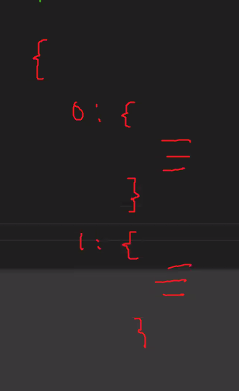

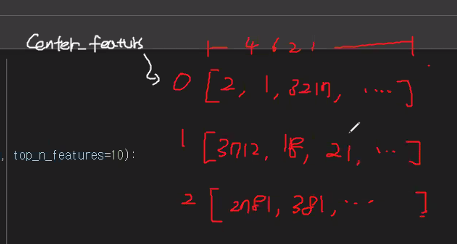

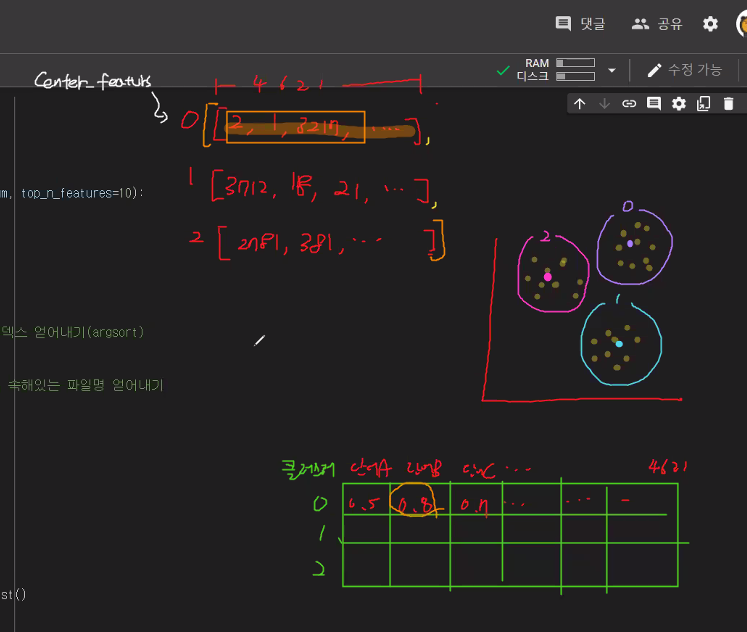

In [ ]:
cluster_detail_info = get_cluster_details(cluster_model = km_cluster,
                                          cluster_data = doc_df,
                                          feature_names =  tfidf_vectorizer.get_feature_names(),
                                          cluster_num = 3,
                                          top_n_features=10)

In [ ]:
cluster_detail_info

{0: {'cluster': 0,
  'top_features': ['interior',
   'seat',
   'mileage',
   'comfortable',
   'gas',
   'gas mileage',
   'transmission',
   'car',
   'performance',
   'quality'],
  'top_features_value': [0.2275614805461199,
   0.19378745396890854,
   0.17650768852547966,
   0.12781250592735727,
   0.12210669727482695,
   0.11603103313745429,
   0.10452042297037821,
   0.10125811465790349,
   0.0966447161573098,
   0.0927271764512046],
  'filenames': ['comfort_honda_accord_2008',
   'comfort_toyota_camry_2007',
   'gas_mileage_toyota_camry_2007',
   'interior_honda_accord_2008',
   'interior_toyota_camry_2007',
   'mileage_honda_accord_2008',
   'performance_honda_accord_2008',
   'quality_toyota_camry_2007',
   'seats_honda_accord_2008',
   'transmission_toyota_camry_2007']},
 1: {'cluster': 1,
  'top_features': ['room',
   'hotel',
   'service',
   'staff',
   'food',
   'location',
   'bathroom',
   'clean',
   'price',
   'parking'],
  'top_features_value': [0.2671555733288591,


In [ ]:
pd.DataFrame(cluster_detail_info)

,0,1,2
cluster,0,1,2
top_features,"[interior, seat, mileage, comfortable, gas, gas mileage, transmission, car, performance, quality]","[room, hotel, service, staff, food, location, bathroom, clean, price, parking]","[screen, battery, keyboard, battery life, life, kindle, video, direction, size, feature]"
top_features_value,"[0.2275614805461199, 0.19378745396890854, 0.17650768852547966, 0.12781250592735727, 0.12210669727482695, 0.11603103313745429, 0.10452042297037821, 0.10125811465790349, 0.0966447161573098, 0.0927271764512046]","[0.2671555733288591, 0.202985604975245, 0.18124837165352842, 0.15234885534071077, 0.1288750593942466, 0.12666122796074167, 0.07498353604060161, 0.07100030157894947, 0.0629211533796568, 0.0564342785601299]","[0.13590971777429786, 0.11908190319410812, 0.0640466602320135, 0.06322567979184304, 0.05851511904612426, 0.05610919434798106, 0.053824856260406964, 0.05363462174238135, 0.05152298175781016, 0.051492030767485764]"
filenames,"[comfort_honda_accord_2008, comfort_toyota_camry_2007, gas_mileage_toyota_camry_2007, interior_honda_accord_2008, interior_toyota_camry_2007, mileage_honda_accord_2008, performance_honda_accord_2008, quality_toyota_camry_2007, seats_honda_accord_2008, transmission_toyota_camry_2007]","[bathroom_bestwestern_hotel_sfo, food_holiday_inn_london, food_swissotel_chicago, free_bestwestern_hotel_sfo, location_bestwestern_hotel_sfo, location_holiday_inn_london, parking_bestwestern_hotel_sfo, price_holiday_inn_london, room_holiday_inn_london, rooms_bestwestern_hotel_sfo, rooms_swissotel_chicago, service_bestwestern_hotel_sfo, service_holiday_inn_london, service_swissotel_hotel_chicago, staff_bestwestern_hotel_sfo, staff_swissotel_chicago]","[accuracy_garmin_nuvi_255W_gps, battery-life_amazon_kindle, battery-life_ipod_nano_8gb, battery-life_netbook_1005ha, buttons_amazon_kindle, directions_garmin_nuvi_255W_gps, display_garmin_nuvi_255W_gps, eyesight-issues_amazon_kindle, features_windows7, fonts_amazon_kindle, keyboard_netbook_1005ha, navigation_amazon_kindle, performance_netbook_1005ha, price_amazon_kindle, satellite_garmin_nuvi_255W_gps, screen_garmin_nuvi_255W_gps, screen_ipod_nano_8gb, screen_netbook_1005ha, size_asus_netbook_1005ha, sound_ipod_nano_8gb, speed_garmin_nuvi_255W_gps, speed_windows7, updates_garmin_nuvi_255W_gps, video_ipod_nano_8gb, voice_garmin_nuvi_255W_gps]"


# 연관성분석

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

doc_list = ['사과 사과 바나나 오렌지 ' ,
            '사과 사과 바나나 오렌지 멜론',
            '이게 제가 할 일이에요? 사과']

tfidf_vect_simple = TfidfVectorizer()
feature_vect_simple = tfidf_vect_simple.fit_transform(doc_list)
print(feature_vect_simple.shape)

(3, 7)


In [2]:
feature_vect_simple.toarray()

array([[0.        , 0.47606294, 0.73941068, 0.47606294, 0.        ,
        0.        , 0.        ],
       [0.53058735, 0.40352536, 0.62674687, 0.40352536, 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.32274454, 0.        , 0.54645401,
        0.54645401, 0.54645401]])

## 코사인 유사도
- 각도가작다 = 서로 유사할수록 코사인값은 커진다!

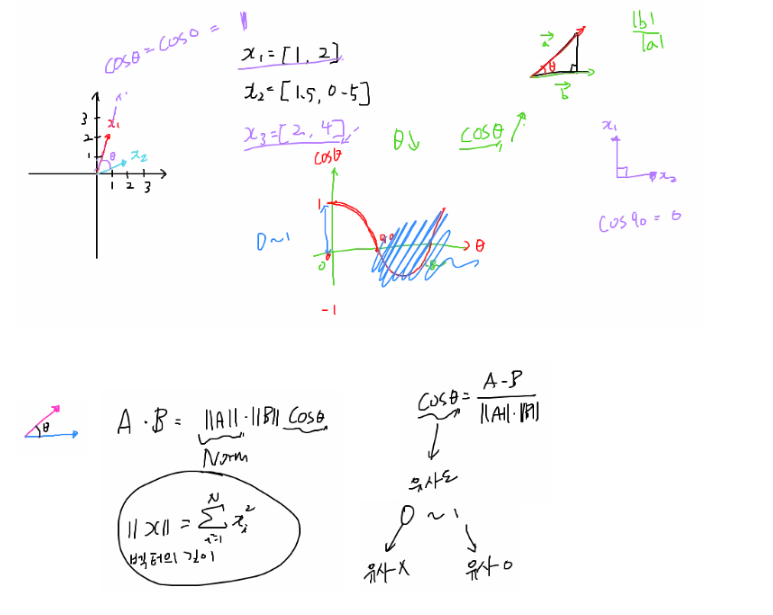

In [3]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_simple_pair = cosine_similarity(feature_vect_simple[0] , feature_vect_simple)
print(similarity_simple_pair)

# 0번째와 0,1,2 나머지 3개와의 연관도. 0과0은 자기자신의 연관이니까 1나옴

[[1.         0.84763026 0.23864076]]


In [15]:
# 예시. 2번 클러스터와 비슷한 문서 찾기. 얼마나 비슷한지도 확인
cluster_2_indexes = doc_df[doc_df['cluster_label']==2].index
cluster_2_indexes

Int64Index([7, 14, 16, 18, 23, 25, 28, 32, 40, 41], dtype='int64')

In [16]:
from sklearn.metrics.pairwise import cosine_similarity

cluster_2_indexes = doc_df[doc_df['cluster_label']==2].index

# 호텔로 클러스터링된 데이터 중 첫번째 문서를 추출하여 파일명 표시.  
comparison_docname = doc_df.iloc[cluster_2_indexes[0]]['filename'] # # iloc는 배열(순번)인덱스 ⭐⭐⭐⭐

print('##### 비교 기준 문서명 ',comparison_docname,' 와 타 문서 유사도######')

# 2번 클러스터 내의 첫 번째 문서와 다른 모든 문서들의 유사도 구하기
similarity_pair = cosine_similarity(feature_vector[cluster_2_indexes[0]] , feature_vector[cluster_2_indexes])
print(similarity_pair)

##### 비교 기준 문서명  interior_toyota_camry_2007  와 타 문서 유사도######
[[1.         0.20859371 0.92989989 0.28071325 0.26370897 0.14094444
  0.06153827 0.11659237 0.03949431 0.09148632]]


In [20]:
sorted_index = similarity_pair.argsort()[:,::-1]
sorted_index = sorted_index[:, 1:]
sorted_index.reshape(-1)

array([2, 3, 4, 1, 5, 7, 9, 6, 8])

In [21]:
cluster2_sorted_indexes = cluster_2_indexes[sorted_index.reshape(-1)]
cluster2_sorted_indexes 
#⭐

Int64Index([16, 18, 23, 14, 25, 32, 41, 28, 40], dtype='int64')

가장 유사도가 큰 파일명 및 유사도:
 filename      interior_honda_accord_2008
similarity                        0.9299
Name: 16, dtype: object


Text(0.5, 1.0, 'interior_toyota_camry_2007')

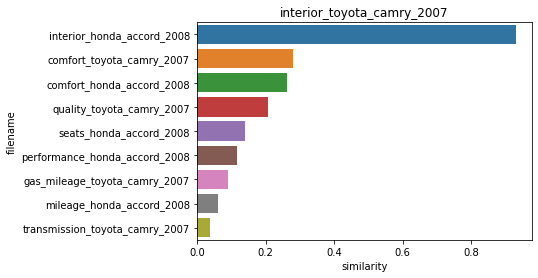

In [23]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# argsort()를 이용하여 앞예제의 첫번째 문서와 타 문서간 유사도가 큰 순으로 정렬한 인덱스 추출하되 자기 자신은 제외. 
sorted_index = similarity_pair.argsort()[:,::-1]
sorted_index = sorted_index[:, 1:]

# 유사도가 큰 순으로 cluster_2_indexes 추출하여 재 정렬
cluster2_sorted_indexes = cluster_2_indexes[sorted_index.reshape(-1)] #⭐

# 유사도가 큰 순으로 유사도 값을 재정렬하되 자기 자신은 제외
cluster2_sim_value = np.sort(similarity_pair.reshape(-1))[::-1] # [::-1] 내림차순으로 바꾸기
cluster2_sim_value = cluster2_sim_value[1:]

# 유사도가 큰 순으로 정렬된 인덱스와 유사도 값을 이용해 파일명과 유사도값을 막대 그래프로 시각화
cluster2_sim_df = pd.DataFrame()
cluster2_sim_df['filename'] = doc_df.iloc[cluster2_sorted_indexes]['filename']
cluster2_sim_df['similarity'] = cluster2_sim_value
print('가장 유사도가 큰 파일명 및 유사도:\n', cluster2_sim_df.iloc[0, :])

sns.barplot(x='similarity', y='filename',data=cluster2_sim_df)
plt.title(comparison_docname)
